Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Figure 9.23

Bootstrap percentile confidence intervals for the mean height in a population in a scenario where we know the true population mean\
Topics and relevant videos: [The bootstrap](https://www.youtube.com/watch?v=yeiMMzjDTWs), [bootstrap percentile confidence intervals](https://youtu.be/EVLST4nPkXA?si=A8XLEbiOpjP3j3JO)

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from scipy.stats import gaussian_kde
from numpy.random import default_rng
import seaborn as sns
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rc('font', family='serif', serif='cm10')
# matplotlib.rc('text', usetex=True)
import matplotlib.transforms

font_size = 15
font_size_legend = 15
font_size_ticks = 15

# data = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')

url = "https://raw.githubusercontent.com/cfgranda/ps4ds/main/data/ANSUR%20II%20MALE%20Public.csv"

data = pd.read_csv(url, encoding='latin-1')

In [2]:
stature = data['stature'] / 10.
N = len(stature)
population_mean = np.mean(stature)
population_std = np.std(stature)
print("N: " + str(len(stature)))
print("Population mean: " + str(round(population_mean,2)))
print("Population standard deviation: " + str(round(population_std,3)))

N: 4082
Population mean: 175.62
Population standard deviation: 6.854


In [3]:
n= 25

rng = default_rng(1234)
tries_sm = int(1e6) # Takes a while, change to 1e5 to make it faster
sample_means = np.zeros(tries_sm)
for ind_tries in range(tries_sm):
    samples = rng.choice(stature,n,replace=True)
    sample_means[ind_tries] = np.mean(samples)

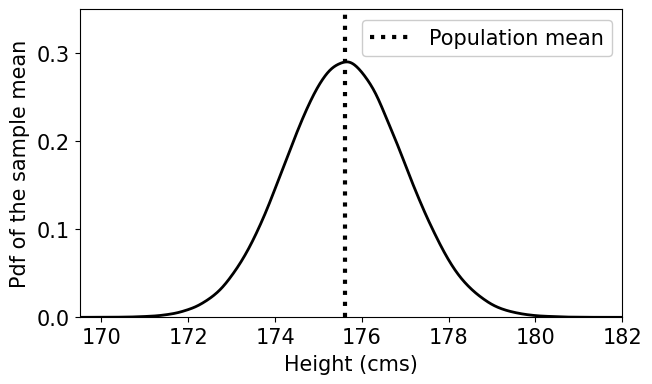

In [4]:
x_min = 169.5
x_max = 182
x = np.linspace(x_min,x_max,500)
y_max = 0.35
eps = 1e-3
x = np.linspace(x_min, x_max, 1000)
    
fig = plt.figure(figsize=(7,4))
pdf = gaussian_kde(sample_means,bw_method=0.1)
plt.plot(x,pdf(x),lw=2,color="black")
plt.vlines(population_mean, 0,y_max,lw=3,ls="dotted",color="black",label="Population mean")
[l,u] = np.percentile(sample_means,[2.5, 97.5])
x_aux = x[x>l]
x_aux = x_aux[x_aux<u]
plt.ylim([0,y_max])
plt.xlim([x_min,x_max])
plt.yticks(np.arange(0,y_max,0.1),np.round(np.arange(0,y_max,0.1),1),fontsize=font_size_ticks)
plt.xticks(fontsize=font_size_ticks)
ax = plt.gca()
plt.ylabel(r"Pdf of the sample mean",fontsize=font_size,labelpad=5)
plt.xlabel(r"Height (cms)",fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size_legend,framealpha=1);

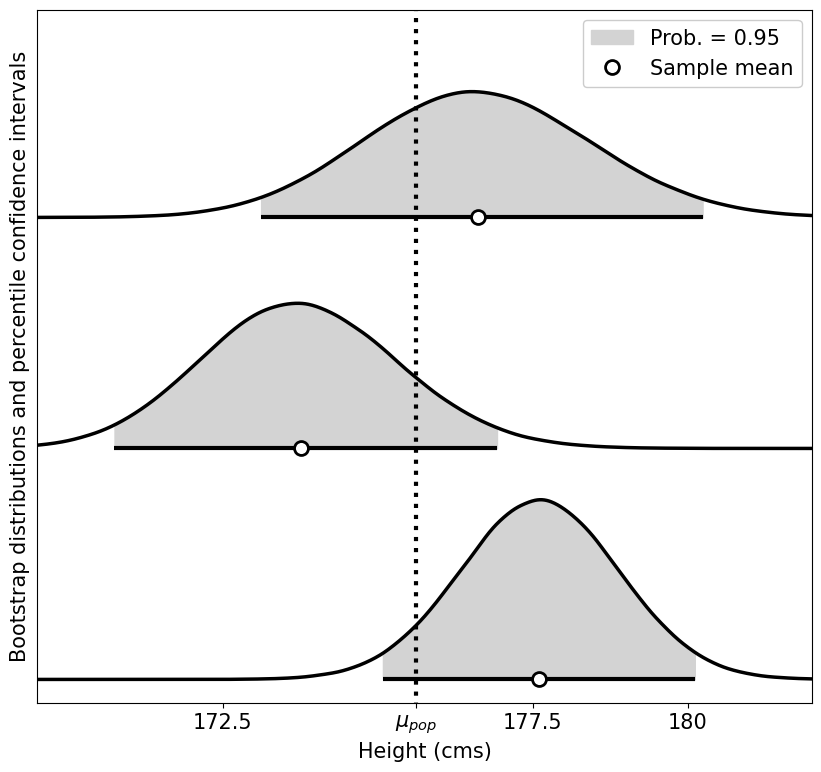

In [5]:
# Bootstrap percentile confidence intervals
rng = default_rng(123456)
step = 0.4

n_bs = int(1e6) # Takes a while, change to 1e5 to make it faster
tries = 3

plt.figure(figsize=(10,9))
plt.xticks([172.5,population_mean,177.5,180],[172.5,r"$\mu_{pop}$",177.5,180],fontsize=font_size)
plt.xlabel('Height (cms)',fontsize=font_size,labelpad=5)
plt.yticks([]) 
plt.vlines(population_mean, -1,tries,lw=3,ls="dotted",color="black")
plt.xlim(x_min,x_max)
plt.ylim(-0.04,3 * step-0.04)
plt.ylabel(r"Bootstrap distributions and percentile confidence intervals",fontsize=font_size,labelpad=5)
for ind in range(tries):
    samples = rng.choice(stature,n,replace=True)
    sample_mean = np.mean(samples)
    sample_mean_bs = np.zeros(n_bs)
    for ind_bs in range(n_bs):
        samples_bs = rng.choice(samples,n,replace=True)
        sample_mean_bs[ind_bs] = np.mean(samples_bs)
    pdf_bs = gaussian_kde(sample_mean_bs,bw_method=0.1)
    plt.plot(x,ind * step + pdf_bs(x),lw=2.5,color="black")

    [l,u] = np.percentile(sample_mean_bs,[2.5, 97.5])
    x_aux = x[x>l]
    x_aux = x_aux[x_aux<u]
    if ind == 0:
        plt.fill_between(x=x_aux,y1=ind * step,y2=ind * step + pdf_bs(x_aux),color="lightgray",label="Prob. = 0.95")
    else:
        plt.fill_between(x=x_aux,y1=ind * step,y2=ind * step + pdf_bs(x_aux),color="lightgray")
    if u < population_mean or l > population_mean:
        plt.hlines(ind * step,l,u,lw=3,color="black",ls="dashed")
    else:
        plt.hlines(ind * step,l,u,lw=3,color="black")
    if ind == 0:
        plt.plot(sample_mean,ind * step,"o",markersize=10,markeredgewidth=2,markerfacecolor = "white",
                 markeredgecolor = "black",label="Sample mean")
    else:
        plt.plot(sample_mean,ind * step,"o",markersize=10,markeredgewidth=2,markerfacecolor = "white",
                 markeredgecolor = "black")
plt.legend(fontsize=font_size_legend,loc="upper right",framealpha=1);